In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)
print(project_root)

/data/wilson/seeing-is-believing


In [3]:
import pandas as pd

df = pd.read_csv("../ISIC2018_Task3_Training_Input/cleaned_data.csv")

In [4]:
from utils.transforms import ShadesOfGrayTransform, MaxRGBTransform
from torchvision import transforms

data_transform_train_with = transforms.Compose([
    transforms.ToTensor(),
    ShadesOfGrayTransform(),
])

data_transform_grey_world = transforms.Compose([
    transforms.ToTensor(),
    ShadesOfGrayTransform(p=1),
])

data_transform_train_without = transforms.Compose([
    transforms.ToTensor(),
])

data_transform_max_rgb = data_transform_grey_world = transforms.Compose([
    transforms.ToTensor(),
    MaxRGBTransform(),
])

2025-11-10 01:37:19.922187: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
file_path = "/data/dataset/ISIC2018_Task3_Training_Input"

In [6]:
from utils.dataset import ImageDataset

image_dataset_with = ImageDataset(
    df = df,
    transform = data_transform_train_with,
    file_path=file_path
)

grey_world = ImageDataset(
    df = df,
    transform = data_transform_grey_world,
    file_path=file_path
)

max_rgb = ImageDataset(
    df = df,
    transform = data_transform_max_rgb,
    file_path=file_path
)

image_dataset_without = ImageDataset(
    df = df,
    transform = data_transform_train_without,
    file_path=file_path
)

In [9]:
def to_numpy_image(tensor):
    return tensor.permute(1, 2, 0).cpu().numpy()

orig_np = to_numpy_image(image_dataset_without[0][0])
corr_np = to_numpy_image(image_dataset_with[0][0])
grey_np = to_numpy_image(grey_world[0][0])
max_rgb_np = to_numpy_image(max_rgb[0][0])

In [15]:
print("Original RGB mean:", orig_np.mean(axis=(0,1)))
print("Corrected RGB mean:", corr_np.mean(axis=(0,1)))
print("Grey World RGB mean:", grey_np.mean(axis=(0,1)))
print("Maximum RGB mean:", max_rgb_np.mean(axis=(0,1)))

Original RGB mean: [0.7887265 0.524476  0.5136242]
Corrected RGB mean: [0.6370921  0.60358346 0.5751251 ]
Grey World RGB mean: [0.7729521  0.55868095 0.4934821 ]
Maximum RGB mean: [0.7729521  0.55868095 0.4934821 ]


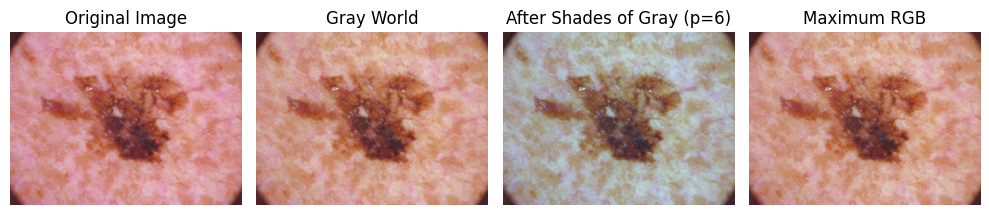

In [ ]:
# from datetime import datetime
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(orig_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(grey_np)
plt.title("Gray World")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(corr_np)
plt.title("After Shades of Gray (p=6)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(max_rgb_np)
plt.title("Maximum RGB")
plt.axis("off")

plt.tight_layout()

# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# pdf_path = f"shades_of_gray_comparison_{timestamp}.pdf"
# plt.savefig(pdf_path, format="pdf", bbox_inches="tight")
plt.show()